In [ ]:
# https://towardsdatascience.com/understanding-pytorch-with-an-example-a-step-by-step-tutorial-81fc5f8c4e8e
#
# Understanding PyTorch with an example: a step-by-step tutorial
# Daniel Godoy
#

In [ ]:
import numpy as np
import torch
import torch.optim as optim
import torch.nn as nn
from torchviz import make_dot
from torch.utils.data import Dataset, TensorDataset, DataLoader
from torch.utils.data.dataset import random_split


In [2]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'

In [3]:
np.random.seed(42)
x = np.random.rand(100, 1)
true_a, true_b = 1, 2
y = true_a + true_b*x + 0.1*np.random.randn(100, 1)

In [4]:
# torch tensors in CPU
x_tensor = torch.from_numpy(x).float()
y_tensor = torch.from_numpy(y).float()

In [5]:
dataset = TensorDataset(x_tensor, y_tensor) # dataset = CustomDataset(x_tensor, y_tensor)

train_dataset, val_dataset = random_split(dataset, [80, 20])

train_loader = DataLoader(dataset=train_dataset, batch_size=16)
val_loader = DataLoader(dataset=val_dataset, batch_size=20)


In [6]:
class ManualLinearRegression(nn.Module):
    def __init__(self):
        super().__init__()
        self.linear = nn.Linear(1, 1)

    def forward(self, x):
        return self.linear(x)

In [7]:
def make_train_step(model, loss_fn, optimizer):
    def train_step(x, y):
        model.train()
        yhat = model(x)
        loss = loss_fn(y, yhat)
        loss.backward()
        optimizer.step()
        optimizer.zero_grad()
        return loss.item()
    return train_step


In [8]:
# Estimate a and b
# torch.manual_seed(42)

model = ManualLinearRegression().to(device) 
# model = nn.Sequential(nn.Linear(1, 1)).to(device)
loss_fn = nn.MSELoss(reduction='mean')
optimizer = optim.SGD(model.parameters(), lr=1e-1)
train_step = make_train_step(model, loss_fn, optimizer)

In [9]:
print(model.state_dict())

OrderedDict([('linear.weight', tensor([[0.8088]], device='cuda:0')), ('linear.bias', tensor([-0.4258], device='cuda:0'))])


In [10]:
n_epochs = 100
training_losses = []
validation_losses = []
for epoch in range(n_epochs):
    batch_losses = []
    for x_batch, y_batch in train_loader:
        x_batch = x_batch.to(device)
        y_batch = y_batch.to(device)
        loss = train_step(x_batch, y_batch)
        batch_losses.append(loss)
    training_loss = np.mean(batch_losses)
    training_losses.append(training_loss)

    with torch.no_grad():
        val_losses = []
        for x_val, y_val in val_loader:
            x_val = x_val.to(device)
            y_val = y_val.to(device)
            model.eval()
            yhat = model(x_val)
            val_loss = loss_fn(y_val, yhat).item()
            val_losses.append(val_loss)
        validation_loss = np.mean(val_losses)
        validation_losses.append(validation_loss)

    print(f"[{epoch+1}] Training loss: {training_loss:.3f}\t Validation loss: {validation_loss:.3f}")

print(model.state_dict())

[1] Training loss: 1.716	 Validation loss: 0.410
[2] Training loss: 0.123	 Validation loss: 0.067
[3] Training loss: 0.023	 Validation loss: 0.029
[4] Training loss: 0.017	 Validation loss: 0.021
[5] Training loss: 0.015	 Validation loss: 0.019
[6] Training loss: 0.014	 Validation loss: 0.017
[7] Training loss: 0.014	 Validation loss: 0.016
[8] Training loss: 0.013	 Validation loss: 0.015
[9] Training loss: 0.012	 Validation loss: 0.014
[10] Training loss: 0.012	 Validation loss: 0.014
[11] Training loss: 0.011	 Validation loss: 0.013
[12] Training loss: 0.011	 Validation loss: 0.013
[13] Training loss: 0.011	 Validation loss: 0.012
[14] Training loss: 0.010	 Validation loss: 0.012
[15] Training loss: 0.010	 Validation loss: 0.011
[16] Training loss: 0.010	 Validation loss: 0.011
[17] Training loss: 0.010	 Validation loss: 0.011
[18] Training loss: 0.009	 Validation loss: 0.010
[19] Training loss: 0.009	 Validation loss: 0.010
[20] Training loss: 0.009	 Validation loss: 0.010
[21] Trai

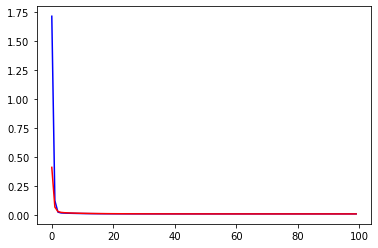

In [12]:
import matplotlib.pyplot as plt 
plt.plot(np.arange(len(training_losses)), training_losses, "-b", 
         np.arange(len(validation_losses)), validation_losses, "-r")